# Proyecto Final: Creación de base de datos, conexión y análisis desde Jupyter Notebook

Universidad de Sonora

Maestría en Ciencia de Datos

**Alumna:** María Elena Martínez Manzanares

**Docente:** Doctor Juan Pablo Soto Barrera

**Asignatura:** Introducción a la Ciencia de Datos y sus Metodologías

***

**Instrucciones.**

1. Crear una base de datos por medio del manejador MySql, SQLite, o PostgreSQL que se componga de una o varias tablas. 
2. Por medio de un Jupyter Notebook crear una conexión a la base de datos. Realizar una consulta a la base de datos desde el notebook.
3. Con los datos disponibles en el Notebook, crear una o más gráficas que representen la información descargada.
4. Documentar su trabajo en formato libre pero de manera comprensiva.

***

**Observación.** Se documentó el trabajo en este Jupyter Notebook, por lo que el punto 4 de las instrucciones se satisface con el presente archivo.

## Punto 0. Descripción de la fuente de datos.

Para este trabajo haremos uso de la tabla [Map of Migrant Mortality](https://humaneborders.info/app/map.asp) de [Arizona OpenGIS Initiative for Deceased Migrants](https://humaneborders.info/). Como esta tabla también fue utilizada para el proyecto final de la asignatura Ingeniería de Características, esta disponible en [este](https://github.com/Maleniski/ing-caracteristicas/blob/main/FuentesDatosMigrantes/ARIZONA.csv) archivo de GitHub.

La tabla se compone de las columnas que se describen en el siguiente diccionario.

| Variable             | Tipo de etiqueta | Etiqueta                                       | Descriptor de la variable                                                               | Tipo de variable     | Unidades     |
|----------------------|------------------|------------------------------------------------|-----------------------------------------------------------------------------------------|----------------------|--------------|
| Name                 | Nominal          | Nombre                                         | Nombre de la persona ubicada sin vida.                                                  | String               | -            |
| Sex                  | Nominal          | Sexo                                           | Sexo de la persona ubicada sin vida.                                                    | String (male/female) | -            |
| Age                  | Ordinal          | Edad                                           | Edad de la persona ubicada sin vida.                                                    | Int                  | [0,$\infty$) |
| Reporting Date       | Ordinal          | Fecha de reporte                               | Fecha en que se reportó el avistamiento del cuerpo.                                     | Datetime             | Año-mes-día  |
| Cause of Death       | Nominal          | Motivos de la muerte                           | Descripción breve de las causas de la muerte.                                           | String               |              |
| OME Determined COD   | Nominal          | Causa de la muerte determinada por el forense. | Causa de la muerte (COD) determinada por el forense (Office of Medical Examiner / OME). | String               |              |
| Body Condition       | Nominal          | Condiciones del cuerpo                         | Nivel de putrefacción del cuerpo al momento de ser encontrado.                          | String               |              |
| Post Mortem Interval | Ordinal          | Intervalo después de la muerte.                | Una estimación en meses del tiempo que llevaba la persona fallecida.                    | String               |              |
| County               | Nominal          | Condado.                                       | Condado (equivalente a municipio) donde fue encontrado el cuerpo.                       | String               |              |

## Punto 1. Crear una base de datos por medio del manejador MySql, SQLite, o PostgreSQL que se componga de una o varias tablas. 



Dentro de MySQL Workbench creamos una nueva base de datos la cual llamaremos 'arizonaopengis'

<img src="Imagenes\\Imagen1.png" alt="Alternative text"/>

Esta ventana nos aparece ya que creamos la base de datos, indicando que hemos acabado el proceso.

<img src="Imagenes\\Imagen2.png" alt="Alternative text"/>

Ahora procedemos a crear la tabla dentro de la base de datos. Antes de eso, la tabla de datos en la columna "Age" tiene datos faltantes. El wizard de MySQL para importar tablas desde archivos csv no maneja bien los datos faltantes y marcará con 0 (cero) a todos los datos faltantes. Eso es grave ya que el valor cero en nuestra columna tiene interpretación al ser la edad de la persona fallecida. Aprovechando que es solamente una tabla y no tiene muchos registros, realizamos un data wrangling con python en donde asignamos los nulos con el valor -1.

<img src="Imagenes\\Imagen3.png" alt="Alternative text"/>

Procedemos a crear la tabla con el wizard de MySQL.

<img src="Imagenes\\Imagen4.png" alt="Alternative text"/>

Seleccionamos la tabla.

<img src="Imagenes\\Imagen5.png" alt="Alternative text"/>

Le ponemos el nombre "migrantmortality".

<img src="Imagenes\\Imagen6.png" alt="Alternative text"/>

Indicamos de que tipo es la variable de cada columna y corregimos el date format ya que la columna "Reporting Date" es de tipo datetime.

<img src="Imagenes\\Imagen7.png" alt="Alternative text"/>

Finalizamos la importación.

<img src="Imagenes\\Imagen8.png" alt="Alternative text"/>

Podemos ver que el wizard no puso bien el primary key (no da opción para marcarlo como tal) y la columna index la marcó con el nombre "MyUnkownColumn".

<img src="Imagenes\\Imagen10.png" alt="Alternative text"/>

Es necesario modificar esto. Utilizando la opción "Alter table", marcamos la columna "MyUnknownColumn" como el primary key (PK) y le cambiamos el nombre a "id".

<img src="Imagenes\\Imagen11.png" alt="Alternative text"/>

Completamos los cambios.

<img src="Imagenes\\Imagen12.png" alt="Alternative text"/>

Nuestra tabla esta lista para continuar con la actividad.

<img src="Imagenes\\Imagen13.png" alt="Alternative text"/>

## Punto 2. Por medio de un Jupyter Notebook crear una conexión a la base de datos. Realizar una consulta a la base de datos desde el notebook.

Se importan las librerías necesarias.

In [1]:
import pymysql
import pandas as pd
import seaborn as sns

d:\Archivos de Programa\Conda\envs\metodologias_pf\lib\site-packages\scipy\__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.23.4
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


Creamos la conexión a la base de datos.

In [54]:
conn=pymysql.connect(host='XXX',port=int(3306),user='XXX',passwd='XXX',db='arizonaopengis')

Realizamos una consulta para corroborar que se realizó la conexión de manera correcta.

In [55]:
df=pd.read_sql_query("SELECT * FROM arizonaopengis.migrantmortality", conn, index_col='id')

df.head(5)

C:\Users\male1\AppData\Local\Temp\ipykernel_17640\1887106604.py:1: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  df=pd.read_sql_query("SELECT * FROM arizonaopengis.migrantmortality", conn, index_col='id')


,Name,Sex,Age,Reporting Date,Cause of Death,OME Determined COD,Body Condition,Post Mortem Interval,County
id,,,,,,,,,
0,Unidentified,male,-1,2000-01-10,Skeletal Remains,UNDETERMINED - MUMMIFIED AND SKELETAL REMAINS,Skeletonization w/ mummification,< 5 weeks,YUMA
1,"Nicolas, Tomas",male,17,2000-01-22,Exposure,HYPOTHERMIA,Fully fleshed,< 1 day,PIMA
2,Unidentified,male,-1,2000-01-20,Skeletal Remains,UNDETERMINED - SKELETAL REMAINS,Complete skeletonization w/ bone degradation,> 6-8 months,SANTA CRUZ
3,Unidentified,male,-1,2000-01-10,Skeletal Remains,UNDETERMINED - SKELETAL REMAINS,Complete skeletonization w/ disarticulation,< 6-8 months,PIMA
4,"Candia-Bravo, Maria Del Rocio",female,20,2000-02-05,Blunt Force Injury,MULTIPLE BLUNT FORCE INJURIES,Fully fleshed,< 1 day,PIMA


Realizamos una consulta más específica. La edades de la columna 'Age' con valores -1 de tabla 'migrantmortality' significa que el registro no contaba con valor de edad. Efectuamos una consulta de los registros que no tienen el valor -1.

In [18]:
query='''SELECT * FROM arizonaopengis.migrantmortality
        WHERE migrantmortality.Age != -1'''

In [19]:
df=pd.read_sql_query(query, conn, index_col='id')

df.head(5)

C:\Users\male1\AppData\Local\Temp\ipykernel_17640\2716538889.py:1: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  df=pd.read_sql_query(query, conn, index_col='id')


,Name,Sex,Age,Reporting Date,Cause of Death,OME Determined COD,Body Condition,Post Mortem Interval,County
id,,,,,,,,,
1,"Nicolas, Tomas",male,17,2000-01-22,Exposure,HYPOTHERMIA,Fully fleshed,< 1 day,PIMA
4,"Candia-Bravo, Maria Del Rocio",female,20,2000-02-05,Blunt Force Injury,MULTIPLE BLUNT FORCE INJURIES,Fully fleshed,< 1 day,PIMA
5,"Enriquez-Hipolito, Natali",female,14,2000-02-05,Blunt Force Injury,MULTIPLE BLUNT FORCE INJURIES,Fully fleshed,< 1 day,PIMA
6,"Castillo, Emma",female,40,2000-02-05,Blunt Force Injury,MULTIPLE BLUNT FORCE INJURIES,Fully fleshed,< 1 day,PIMA
7,"Morales-Avenado, Luis",male,41,2000-02-05,Blunt Force Injury,MULTIPLE BLUNT FORCE INJURIES,Fully fleshed,< 1 day,PIMA


## Punto 3. Con los datos disponibles en el Notebook, crear una o más gráficas que representen la información descargada.

Hacemos un histograma de las edades.

<AxesSubplot:xlabel='Age', ylabel='Count'>

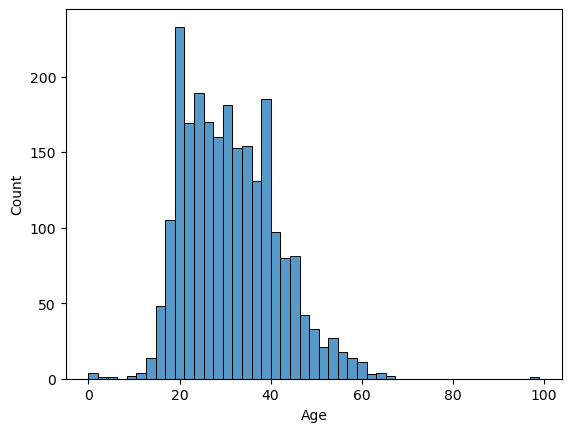

In [25]:
sns.histplot(data=df,x="Age")

Finalmente, hacemos una gráfica de barras de la columna 'Body Condition'.

In [52]:
body_c=(df.groupby("Body Condition").count()
        .reset_index()
        .sort_values(by="Name", ascending=False)
        .rename(columns={"Name":"Cantidad"})[["Body Condition","Cantidad"]])
body_c

,Body Condition,Cantidad
4,Fully fleshed,1023
2,Decomposed,376
7,Skeletonization w/ mummification,273
3,Decomposed w/ focal skeletonization,217
6,Skeletonization w/ articulation/ligamentous at...,164
0,Complete skeletonization w/ bone degradation,160
1,Complete skeletonization w/ disarticulation,124
5,Other,1


<AxesSubplot:xlabel='Body Condition'>

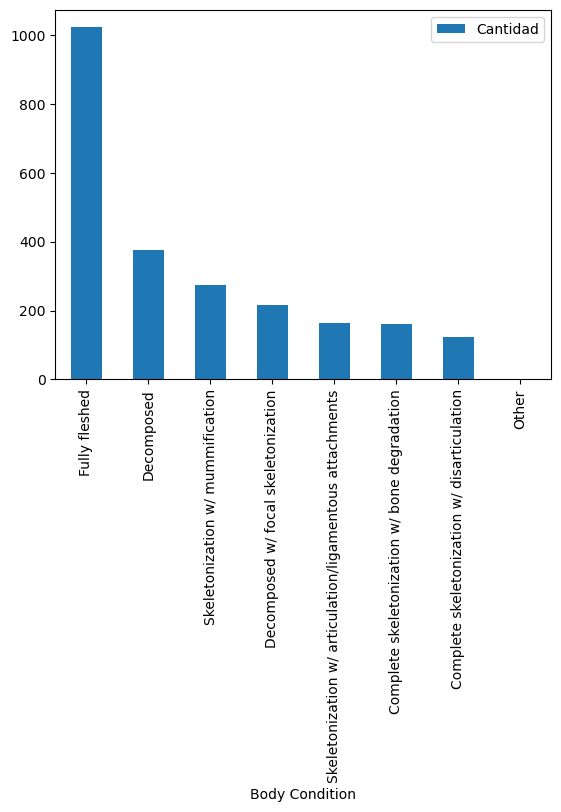

In [53]:
body_c.plot.bar(x="Body Condition",y="Cantidad")